In [12]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [13]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [14]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [15]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    if game_num == 0:
        continue
        
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    
    if old_score == 0:
        continue
        
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and one_date < '2018-09-16_17-00-24' and elo < 0:
        elo = 0
    #elif one_date >= '2018-09-16_17-00-24' and elo < -100:
    #    elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

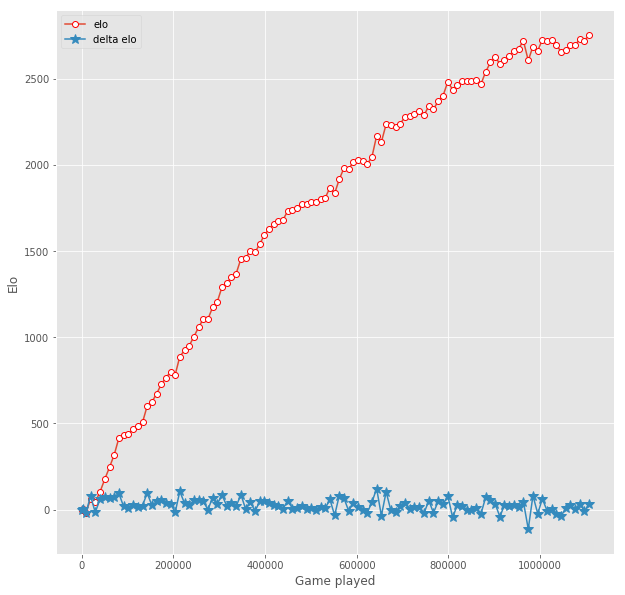

In [16]:
plt.figure(figsize=(10,10))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [17]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i == 0 else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
100,2018-10-03_23-50-16_noup,-6.346561,2720.021617,1015493,10241,0.077626,219,0.490868,上位
101,2018-10-04_03-30-13_noup,3.173016,2723.194633,1025804,10311,0.086758,219,0.504566,上位
102,2018-10-04_07-20-13_noup,-27.024253,2696.170379,1035965,10161,0.073059,219,0.461187,上位
103,2018-10-04_10-50-13_noup,-38.228665,2657.941715,1046117,10152,0.059361,219,0.445205,上位
104,2018-10-04_14-10-13_noup,7.933698,2665.875413,1056331,10214,0.091324,219,0.511416,上位
105,2018-10-04_17-20-13_noup,28.620915,2694.496328,1066480,10149,0.059361,219,0.541096,上位
106,2018-10-04_20-40-14_noup,1.593752,2696.090080,1076995,10515,0.077982,218,0.502294,上位
107,2018-10-05_00-50-13_noup,35.020327,2731.110407,1087029,10034,0.068493,219,0.550228,上位
108,2018-10-05_04-40-14_noup,-9.521166,2721.589241,1097221,10192,0.031963,219,0.486301,上位
109,2018-10-05_08-00-13_noup,33.418421,2755.007662,1107273,10052,0.036530,219,0.547945,上位


In [18]:
!ls -l ../data/distributed/ | wc -l 

629


In [19]:
!ls -l ../data/distributed/ | grep peace | wc -l

0


In [20]:
!ls -l ../data/distributed/ | grep '_w'| wc -l 

371


In [21]:
!ls -l ../data/distributed/ | grep '_b'| wc -l 

258


In [22]:
! date

2018年 10月 05日 星期五 11:33:39 CST
